In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import graphviz 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

%matplotlib inline

In [ ]:
def CorrelationHeatmap(df):
    corr = df.corr()
#     print(corr)
    plt.figure(figsize=(8,8))
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
    
def NumericalFeatureHistogram(df, datatype):
    if datatype == "bike":
        df.hist(column=["temp", "atemp", "hum", "windspeed"], ec='black', grid=False, figsize=(10,10))
    elif datatype == "video":
        df.hist(figsize=(15, 15), layout=(6, 3), ec='black', grid=False, column=["duration", "height", "width", "bitrate", "framerate", "i", "p", "b", "frames", "i_size", "p_size", "b_size", "size", "o_bitrate", "o_framerate", "o_width", "o_height"])
    
def CategoricalFeatureBoxplot(df, datatype):
    if datatype == "bike":
        for col in ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]:
            df.boxplot(by=col, column=["casual", "registered", "cnt"], figsize=(15,6), layout=(1,3))
    elif datatype == "video":
        for col in ["codec", "o_codec"]:
            df.boxplot(by=col, column="utime", figsize=(6,6))

In [110]:
bike_df = pd.read_csv("Bike-Sharing-Dataset/day.csv")
print(bike_df.head(5))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


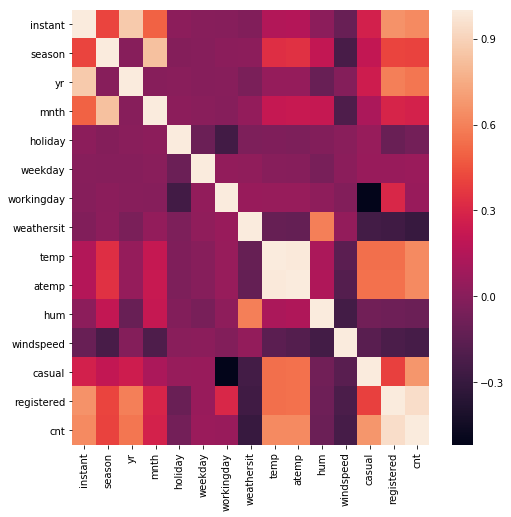

In [8]:
CorrelationHeatmap(bike_df)

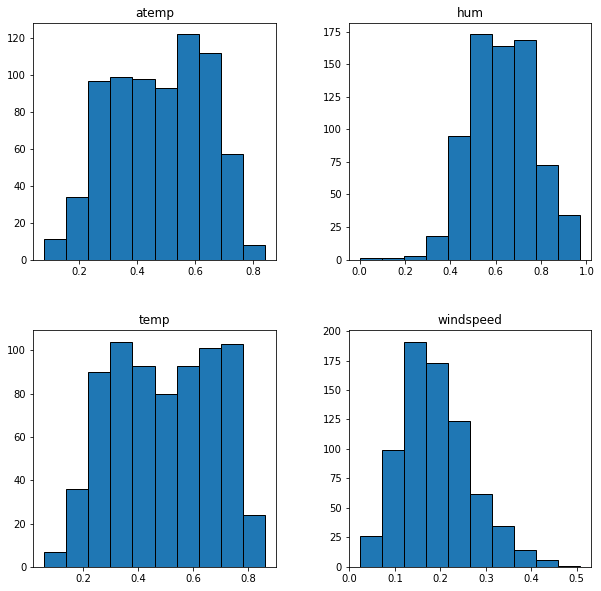

In [5]:
NumericalFeatureHistogram(bike_df, "bike")

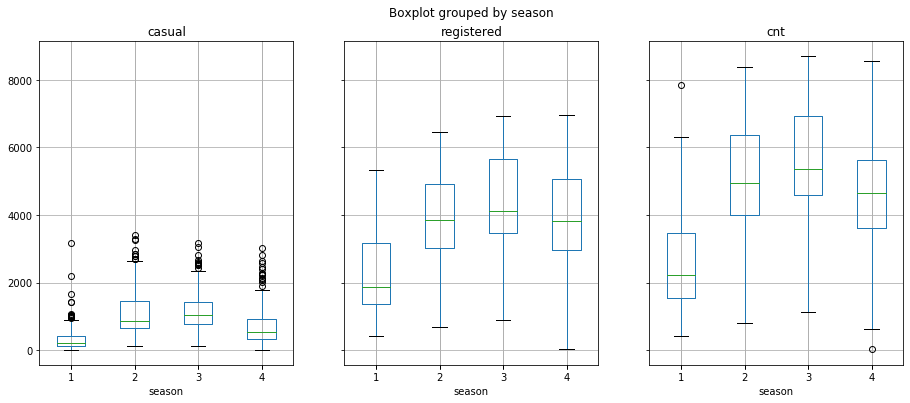

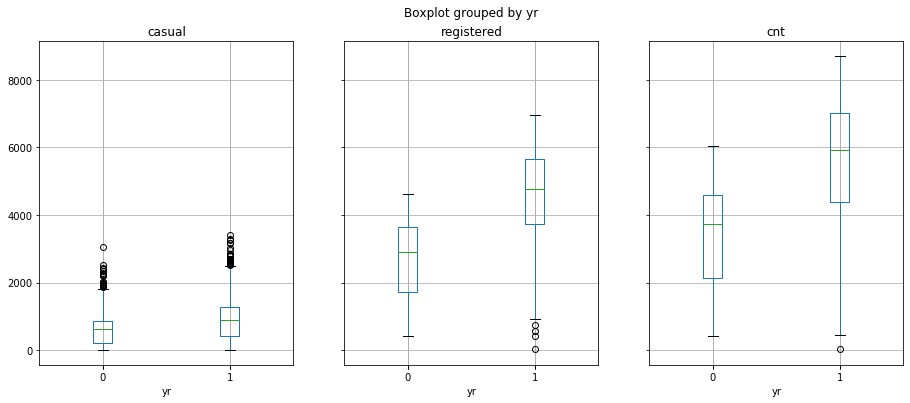

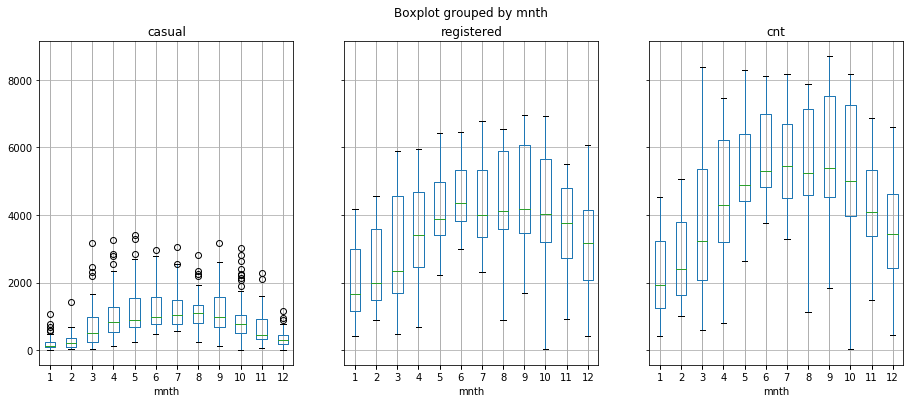

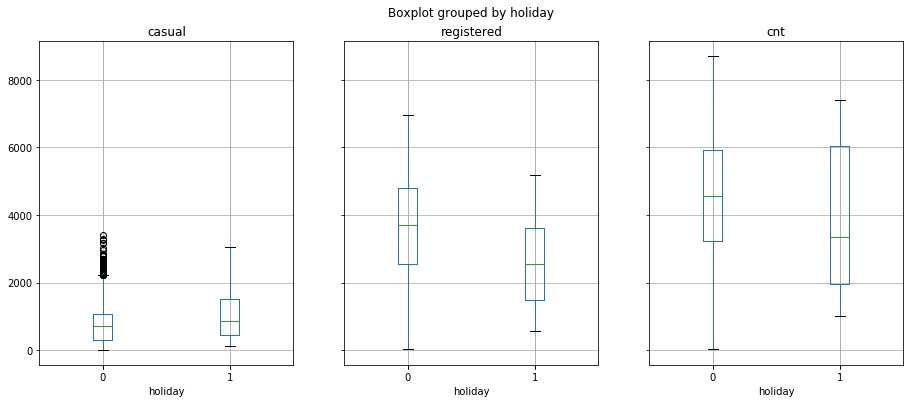

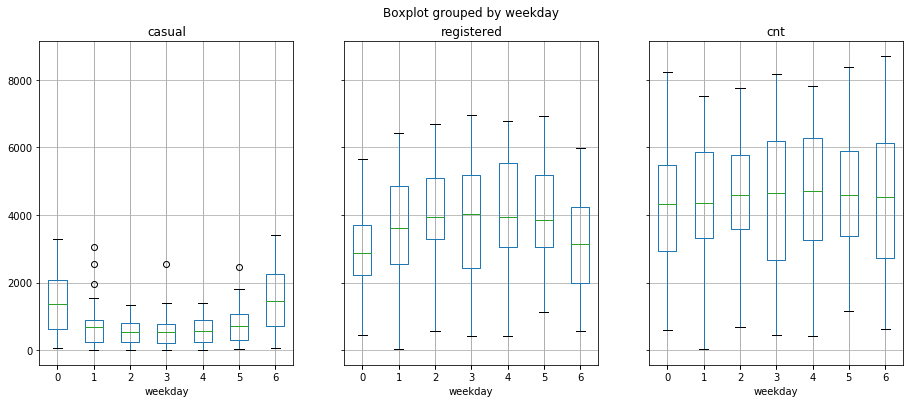

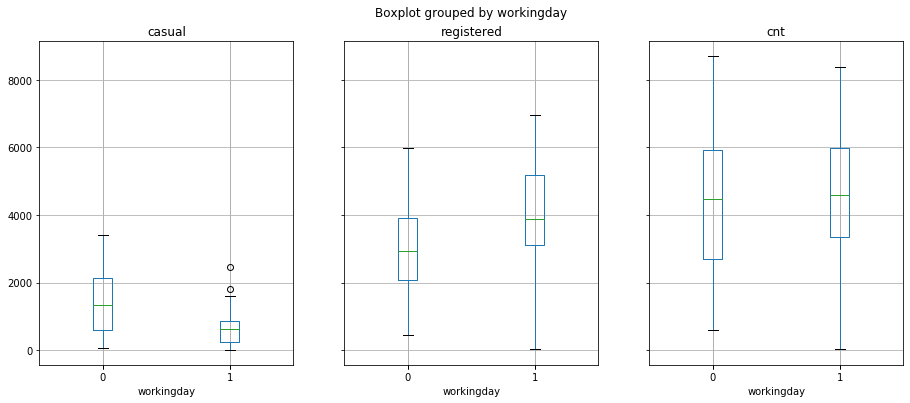

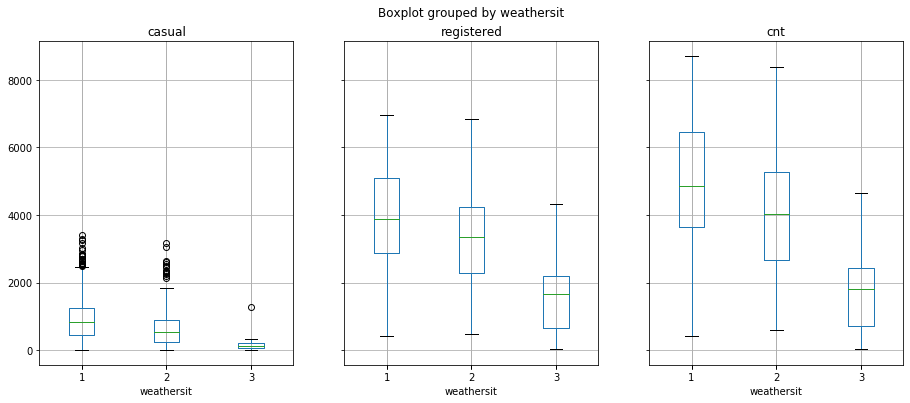

In [6]:
CategoricalFeatureBoxplot(bike_df, "bike")

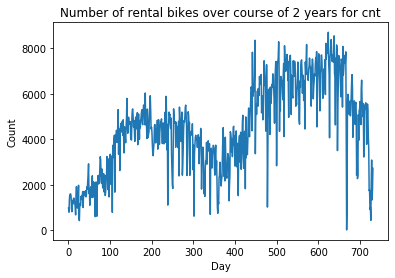

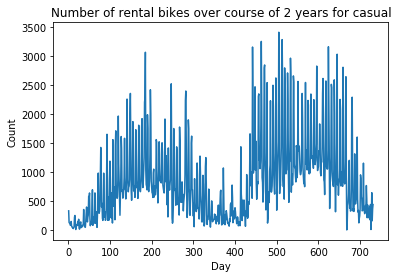

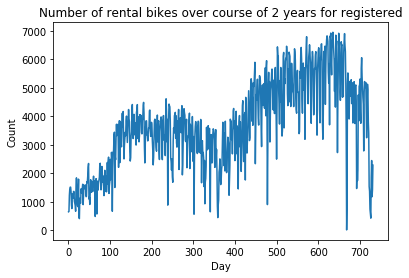

In [7]:
plt.plot(bike_df['instant'], bike_df['cnt'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for cnt")
plt.show()
plt.plot(bike_df['instant'], bike_df['casual'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for casual")
plt.show()
plt.plot(bike_df['instant'], bike_df['registered'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for registered")
plt.show()

In [111]:
video_df = pd.read_csv("online_video_dataset/transcoding_mesurment.tsv", sep='\t')
print(video_df.head(5))

            id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  225

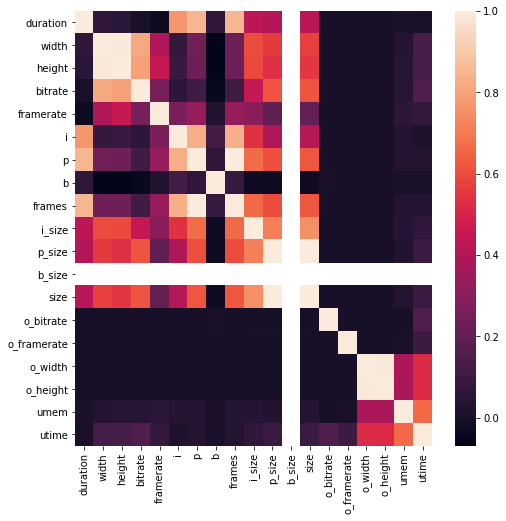

In [9]:
CorrelationHeatmap(video_df)

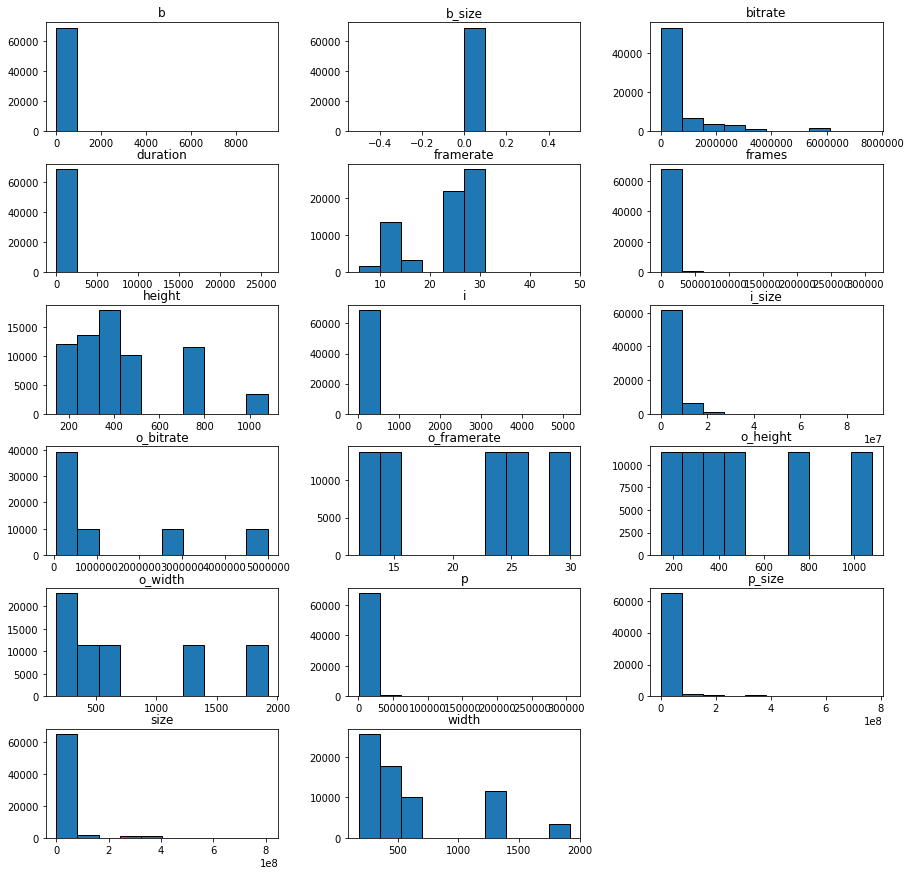

In [10]:
NumericalFeatureHistogram(video_df, "video")

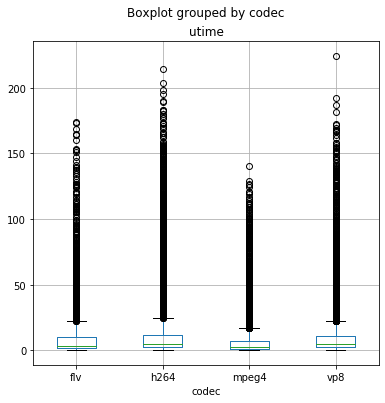

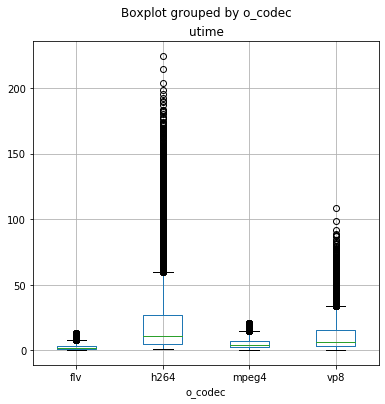

In [11]:
CategoricalFeatureBoxplot(video_df, "video")

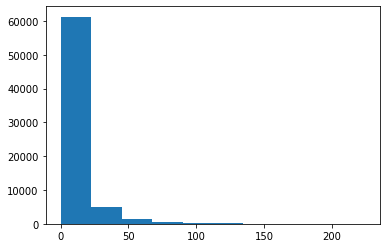

Mean of transcoding times: 9.996354820888516
Median of transcoding times: 4.408


In [12]:
plt.hist(video_df['utime'])
plt.show()
print("Mean of transcoding times:", np.mean(video_df['utime']))
print("Median of transcoding times:", np.median(video_df['utime']))

In [108]:
bike_num_col = ["temp", "atemp", "hum", "windspeed"]
bike_cat_col = ["season", "weekday", "weathersit"] #mnth, holiday, yr

video_num_col = ["duration", "height", "bitrate", "framerate", "i", "p", "b", "frames", "i_size", "p_size", 
                 "b_size", "size", "o_bitrate", "o_framerate", "height", "width", "o_height", "o_width"]
video_cat_col = ["codec", "o_codec"]

def TestFeatures(df, dataset):
    if dataset == "bike":
        cat_col = ["season", "weekday", "weathersit", "mnth", "holiday", "yr"]
    elif dataset == "video":
        cat_col = video_cat_col
        for c in cat_col:
            df[c] = df[c].astype("category").cat.codes
        
    cat_inds = [df.columns.get_loc(c) for c in cat_col]
        
    target_col = "cnt" if dataset == "bike" else "utime"
    target = df[target_col]
    df = df.drop(columns=target_col)
    data = df.values
    
    if dataset == "video":
        inds = np.random.choice(len(data), 5000)
        data = data[inds] # takes too long to run on entire dataset
        target = target[inds]
        print(data.shape)

    mi = mutual_info_regression(data, target, discrete_features=cat_inds)
    mi /= np.max(mi)
    
    f_test, _ = f_regression(data, target)
    f_test /= np.max(f_test)
    
    for i, col in enumerate(df.columns):
        print("{} - f score: {}, mi score: {}".format(col, f_test[i], mi[i]))

def Standardize(df, dataset):
    if dataset == "bike":
        num_col = bike_num_col
    elif dataset == "video":
        num_col = video_num_col
        
    for col in num_col: # standardize numerical features
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    return df

def Encode(df, dataset):
    if dataset == "bike":
        cat_col = ["season", "weekday", "weathersit"] #mnth
    elif dataset == "video":
        cat_col = video_cat_col
    for col in cat_col: # encode categorical features
        if col in df.columns:
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1).drop([col], axis=1)
    return df
        
def DropFeatures(df, dataset):
    if dataset == "bike":
        rem_col = ["instant", "dteday", "casual", "registered"]
    elif dataset == "video":
        rem_col = ["id", "umem"]
    df = df.drop(columns=rem_col) # drop features
    return df

def TestAndAugmentData(df, dataset, scale=True, test=True):
    df = df.copy()
    if scale:
        df = Standardize(df, dataset)
    df = DropFeatures(df, dataset)
    if test:
        TestFeatures(df, dataset)
    # decide what other features to drop here
#     if dataset == "bike":
#         drop_cols = ["workingday"]
#         df = df.drop(columns=drop_cols)
#     if dataset == "video":
#         drop_cols = ["b", "b_size"]
#         df = df.drop(columns=drop_cols)
    df = Encode(df, dataset)
    return df

def EvalModel(model, data, target):
    rmse_func = make_scorer(mean_squared_error, squared=False)
    res = cross_validate(model, data, target, cv=10, scoring=rmse_func, return_train_score=True)
    train_rmse = np.mean(res['train_score'])
    test_rmse = np.mean(res['test_score'])
    #print("Train RMSE:", train_rmse)
    #print("Test RMSE:", test_rmse)
    return train_rmse, test_rmse

In [112]:
scaled_bike_df = TestAndAugmentData(bike_df, "bike")

season - f score: 0.2984068116897176, mi score: 0.46257251764116186
yr - f score: 0.7148668340376637, mi score: 0.5956380075493531
mnth - f score: 0.12851916377396827, mi score: 0.8185959648390734
holiday - f score: 0.007091741052579161, mi score: 0.02472021997427191
weekday - f score: 0.006904470107277365, mi score: 0.09667571902319484
workingday - f score: 0.005672541883169538, mi score: 0.049640758463955326
weathersit - f score: 0.14660310061621423, mi score: 0.14335913815020504
temp - f score: 0.9813814493974297, mi score: 0.8372446710017212
atemp - f score: 1.0, mi score: 1.0
hum - f score: 0.015466625198484935, mi score: 0.09896322582866361
windspeed - f score: 0.08796240528337745, mi score: 0.1201317697775226


In [113]:
print(scaled_bike_df.head(2))

   yr  mnth  holiday  workingday      temp     atemp       hum  windspeed  \
0   0     1        0           0 -0.826662 -0.679946  1.250171  -0.387892   
1   0     1        0           0 -0.721095 -0.740652  0.479113   0.749602   

   cnt  season_1  ...  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0  985         1  ...          0          0          0          0          0   
1  801         1  ...          1          0          0          0          0   

   weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3  
0          0          1             0             1             0  
1          0          0             0             1             0  

[2 rows x 23 columns]


In [114]:
bike_target = scaled_bike_df["cnt"]
bike_data_df = scaled_bike_df.drop(columns="cnt")
bike_data = bike_data_df.values


train, test = EvalModel(LinearRegression(), bike_data, bike_target)
print("Train RMSE:", train)
print("Test RMSE:", test)

Train RMSE: 796.7698408468711
Test RMSE: 898.1630729439821


In [115]:
scaled_video_df = TestAndAugmentData(video_df, "video")

(5000, 19)
duration - f score: nan, mi score: 0.9230640685379841
codec - f score: nan, mi score: 0.2446359508542177
width - f score: nan, mi score: 0.5406820995975496
height - f score: nan, mi score: 0.5485884307512573
bitrate - f score: nan, mi score: 0.9401348876223908
framerate - f score: nan, mi score: 0.5179062009075539
i - f score: nan, mi score: 0.9506725787807092
p - f score: nan, mi score: 0.9665520641024704
b - f score: nan, mi score: 0.02229159347583009
frames - f score: nan, mi score: 0.9564725216542652
i_size - f score: nan, mi score: 0.9316658641532355
p_size - f score: nan, mi score: 0.8621988578998372
b_size - f score: nan, mi score: 0.0
size - f score: nan, mi score: 0.8797364424065606
o_codec - f score: nan, mi score: 0.9112096653878656
o_bitrate - f score: nan, mi score: 0.14842983554067785
o_framerate - f score: nan, mi score: 0.06163663913236765
o_width - f score: nan, mi score: 0.9942503641876944
o_height - f score: nan, mi score: 1.0


C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\shb20\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\shb20\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\shb20\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [116]:
print(scaled_video_df.head(2))

   duration     width    height   bitrate  framerate         i        p  \
0  -0.54327 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
1  -0.54327 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   

          b    frames    i_size  ...  o_height  utime  codec_0  codec_1  \
0 -0.098879 -0.825201 -0.641488  ... -1.138803  0.612        0        0   
1 -0.098879 -0.825201 -0.641488  ... -0.834975  0.980        0        0   

   codec_2  codec_3  o_codec_0  o_codec_1  o_codec_2  o_codec_3  
0        1        0          0          0          1          0  
1        1        0          0          0          1          0  

[2 rows x 26 columns]


In [117]:
video_target = scaled_video_df["utime"]
video_data_df = scaled_video_df.drop(columns="utime")
video_data = video_data_df.values

train, test = EvalModel(LinearRegression(), video_data, video_target)
print("Train RMSE:", train)
print("Test RMSE:", test)

Train RMSE: 10.997184031725954
Test RMSE: 221825170.2528042


In [ ]:
# 3.2.1

In [118]:
def sweepy_boi(classifier, data, target):
    powers = np.arange(-3,4)
    er_by_k = np.zeros((len(powers), 2))
    for i, power in enumerate(powers):
        k = 10.0**power

        if classifier == 'lasso':
            train_rsme, test_rsme = EvalModel(Lasso(alpha=k,max_iter=10000),data, target)
            er_by_k[i, 0]=train_rsme
            er_by_k[i, 1]=test_rsme
        elif classifier == 'ridge':
            train_rsme, test_rsme = EvalModel(Ridge(alpha=k,max_iter=10000),data,target)
            er_by_k[i, 0]=train_rsme
            er_by_k[i, 1]=test_rsme
            
    return er_by_k



lasso_bike_er_by_k = sweepy_boi('lasso',bike_data,bike_target)
lasso_video_er_by_k = sweepy_boi('lasso',video_data,video_target)
ridge_bike_er_by_k = sweepy_boi('ridge',bike_data,bike_target)
ridge_video_er_by_k = sweepy_boi('ridge',video_data,video_target)



C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1352010.0459238887, tolerance: 199790.9642304414
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3194997.7857789993, tolerance: 255245.10859148938
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3040464.942407012, tolerance: 271504.2992972644
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

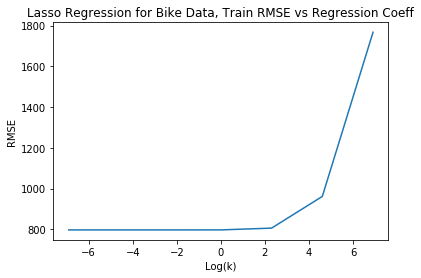

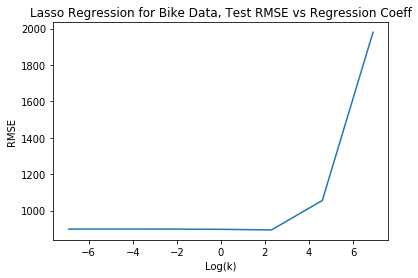

min test RSME =  893.4860556364001 at alpha =  10.0


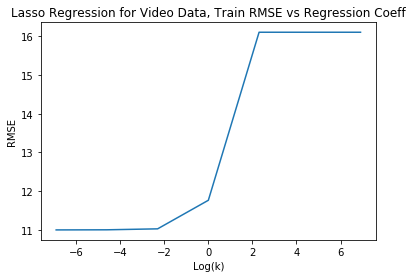

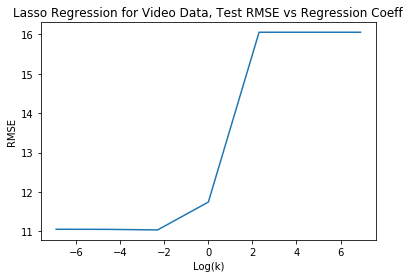

min test RSME =  11.037695054277188 at alpha =  0.1


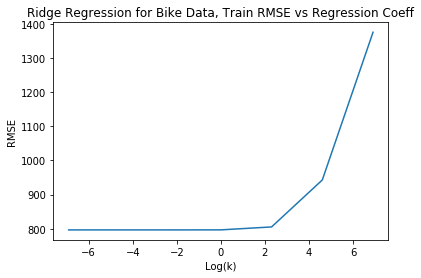

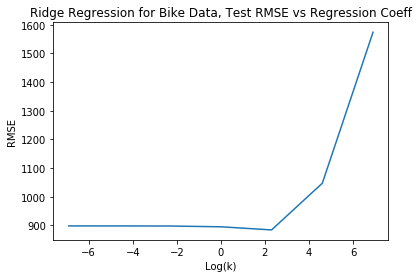

min test RSME =  884.2326658829454 at alpha =  10.0


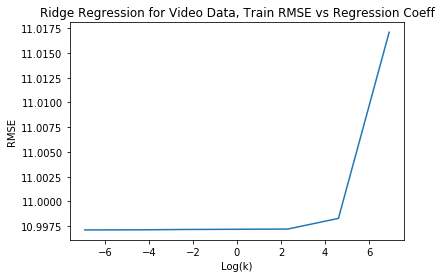

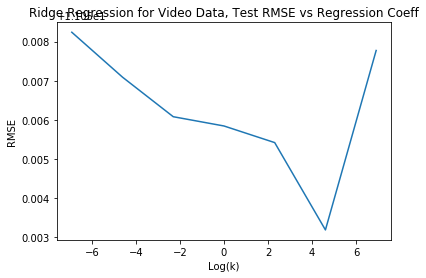

min test RSME =  11.053173994681867 at alpha =  100.0


In [119]:
ks = 10.0 ** np.arange(-3,4)
plt.plot(np.log(ks),lasso_bike_er_by_k[:, 0])
plt.title("Lasso Regression for Bike Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

ks = 10.0 ** np.arange(-3,4)
plt.plot(np.log(ks),lasso_bike_er_by_k[:, 1])
plt.title("Lasso Regression for Bike Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

print("min test RSME = ", np.min(lasso_bike_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(lasso_bike_er_by_k[:, 1])] ))

plt.plot(np.log(ks),lasso_video_er_by_k[:, 0])
plt.title("Lasso Regression for Video Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

plt.plot(np.log(ks),lasso_video_er_by_k[:, 1])
plt.title("Lasso Regression for Video Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()
      
print("min test RSME = ", np.min(lasso_video_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(lasso_video_er_by_k[:, 1])] ))

plt.plot(np.log(ks),ridge_bike_er_by_k[:, 0])
plt.title("Ridge Regression for Bike Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

plt.plot(np.log(ks),ridge_bike_er_by_k[:, 1])
plt.title("Ridge Regression for Bike Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()
      
print("min test RSME = ", np.min(ridge_bike_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(ridge_bike_er_by_k[:, 1])] ))

plt.plot(np.log(ks),ridge_video_er_by_k[:, 0])
plt.title("Ridge Regression for Video Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

plt.plot(np.log(ks),ridge_video_er_by_k[:, 1])
plt.title("Ridge Regression for Video Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

print("min test RSME = ", np.min(ridge_video_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(ridge_video_er_by_k[:, 1])] ))


In [120]:
scaled_bike_data = bike_data
scaled_video_data = video_data

unscaled_bike_df = TestAndAugmentData(bike_df, "bike", test=False, scale=False)
unscaled_bike_data_df = unscaled_bike_df.drop(columns="cnt")
unscaled_bike_data = unscaled_bike_data_df.values

unscaled_video_df = TestAndAugmentData(video_df, "video", test=False, scale=False)
unscaled_video_data_df = unscaled_video_df.drop(columns="utime")
unscaled_video_data = unscaled_video_data_df.values

print(scaled_bike_data[0])
print(unscaled_bike_data[0])

train_rsme_bike_lr, test_rsme_bike_lr=EvalModel(LinearRegression(), unscaled_bike_data, bike_target)

print("Bike data, Linear Regression, unscaled data:")
print("Train RSME: ",train_rsme_bike_lr)
print("Test RSME: ",test_rsme_bike_lr )

train_rsme_bike_lr_scale, test_rsme_bike_lr_scale=EvalModel(LinearRegression(), scaled_bike_data, bike_target)

print("Bike data, Linear Regression, scaled data:")
print("Train RSME: ",train_rsme_bike_lr_scale)
print("Test RSME: ",test_rsme_bike_lr_scale )

train_rsme_bike_lasso, test_rsme_bike_lasso = EvalModel(Lasso(alpha=1e-3,max_iter=10000), unscaled_bike_data, bike_target)

print("Bike data, Lasso Regularization, unscaled data:")
print("Train RSME: ",train_rsme_bike_lasso)
print("Test RSME: ",test_rsme_bike_lasso)

train_rsme_bike_lasso_scale, test_rsme_bike_lasso_scale = EvalModel(Ridge(alpha=1e-3,max_iter=10000),scaled_bike_data, bike_target)

print("Bike data, Lasso Regularization, scaled data:")
print("Train RSME: ",train_rsme_bike_lasso_scale)
print("Test RSME: ", test_rsme_bike_lasso_scale)

train_rsme_bike_ridge, test_rsme_bike_ridge = EvalModel(Ridge(alpha=1e-3,max_iter=10000),unscaled_bike_data, bike_target)

print("Bike data, Ridge Regularization, unscaled data:")
print("Train RSME: ",train_rsme_bike_ridge)
print("Test RSME: ", test_rsme_bike_ridge)

train_rsme_bike_ridge_scale, test_rsme_bike_ridge_scale = EvalModel(Ridge(alpha=1e-3,max_iter=10000),scaled_bike_data, bike_target)

print("Bike data, Ridge Regularization, scaled data:")
print("Train RSME: ",train_rsme_bike_ridge_scale)
print("Test RSME: ", test_rsme_bike_ridge_scale)

[ 0.          1.          0.          0.         -0.82666213 -0.67994602
  1.25017133 -0.38789169  1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          1.          0.        ]
[0.       1.       0.       0.       0.344167 0.363625 0.805833 0.160446
 1.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       1.       0.       1.       0.      ]
Bike data, Linear Regression, unscaled data:
Train RSME:  796.769840846871
Test RSME:  898.1630729439788
Bike data, Linear Regression, scaled data:
Train RSME:  796.7698408468711
Test RSME:  898.1630729439821


C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1352420.7153195739, tolerance: 199790.9642304414
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3195595.8901960254, tolerance: 255245.10859148938
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3041188.825561583, tolerance: 271504.2992972644
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Bike data, Lasso Regularization, unscaled data:
Train RSME:  796.769841233206
Test RSME:  898.1612589054266
Bike data, Lasso Regularization, scaled data:
Train RSME:  796.7698410287963
Test RSME:  898.1597824221192
Bike data, Ridge Regularization, unscaled data:
Train RSME:  796.7698690245055
Test RSME:  898.1512672697447
Bike data, Ridge Regularization, scaled data:
Train RSME:  796.7698410287963
Test RSME:  898.1597824221192


In [69]:
#3.2.2

In [79]:

def poly_reg(degree):
    poly = PolynomialFeatures(degree)
    bike_data_poly = poly.fit_transform(bike_data)
    train_rsme_bike_poly, test_rsme_bike_poly=EvalModel(Ridge(alpha=0.001, max_iter=10000), bike_data_poly, bike_target)
    print("Polynomial Regression Train RSME: ", train_rsme_bike_poly)
    print("Polynomial Regression Test RSME: ", test_rsme_bike_poly)
    
    
degrees = np.arange(1,5)
for degree in degrees:
    print("For polynomial degree", degree)
    poly_reg(degree)

For polynomial degree 1
Polynomial Regression Train RSME:  796.7698410287963
Polynomial Regression Test RSME:  898.1597824221186
For polynomial degree 2
Polynomial Regression Train RSME:  508.2759534352989
Polynomial Regression Test RSME:  1434.5713459363037
For polynomial degree 3
Polynomial Regression Train RSME:  184.09556214423327
Polynomial Regression Test RSME:  5941.680725529786
For polynomial degree 4
Polynomial Regression Train RSME:  0.24842486022994942
Polynomial Regression Test RSME:  5574.842426642535


In [175]:
bike_data_inv = np.power(bike_data+1e-10,-1)
bike_data_with_inv = np.concatenate((bike_data, bike_data_inv),axis=1)

poly = PolynomialFeatures(1)
bike_data_poly_with_inv = poly.fit_transform(bike_data_with_inv)
train_rsme_bike_poly_with_inv, test_rsme_bike_poly_with_inv=EvalModel(Ridge(alpha=0.001, max_iter=10000), bike_data_poly_with_inv, bike_target)
print("Polynomial Regression with inv Train RSME: ", train_rsme_bike_poly_with_inv)
print("Polynomial Regression with inv Test RSME: ", test_rsme_bike_poly_with_inv)


Train RMSE: 791.3601117262463
Test RMSE: 903.8120922369017
Polynomial Regression with inv Train RSME:  791.3601117262463
Polynomial Regression with inv Test RSME:  903.8120922369017


In [ ]:
#3.3.3

In [113]:
nn = MLPRegressor(solver='adam', alpha=1e-4,
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme, test_rsme = EvalModel(nn, bike_data, bike_target)

print("MLP Train RSME:", train_rsme)
print("MLP Test RSME:",test_rsme)

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Train RSME: 751.139575412604
MLP Test RSME: 863.3765486761946


In [115]:
nn_identity = MLPRegressor(solver='adam', alpha=1e-4, activation='identity',
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme_identity, test_rsme_identity = EvalModel(nn_identity, bike_data, bike_target)

print("MLP, identity activation Train RSME:", train_rsme_identity)
print("MLP, identity activation Test RSME:",test_rsme_identity)

nn_logistic = MLPRegressor(solver='adam', alpha=1e-4, activation ='logistic',
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme_logistic, test_rsme_logistic = EvalModel(nn_logistic, bike_data, bike_target)

print("MLP, logistic activation Train RSME:", train_rsme_logistic)
print("MLP, logistic activation Test RSME:",test_rsme_logistic)

nn_tanh = MLPRegressor(solver='adam', alpha=1e-4, activation='tanh',
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme_tanh, test_rsme_tanh = EvalModel(nn_tanh, bike_data, bike_target)

print("MLP, tanh activation Train RSME:", train_rsme_tanh)
print("MLP, tanh activation Test RSME:",test_rsme_tanh)

nn = MLPRegressor(solver='adam', alpha=1e-4,
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme, test_rsme = EvalModel(nn, bike_data, bike_target)

print("MLP, relu activation Train RSME:", train_rsme)
print("MLP, relu activation Test RSME:",test_rsme)

MLP, identity activation Train RSME: 798.406852470478
MLP, identity activation Test RSME: 899.6093531548374


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

MLP, logistic activation Train RSME: 4771.019520961908
MLP, logistic activation Test RSME: 4500.380149097334


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

MLP, tanh activation Train RSME: 4742.7110902955665
MLP, tanh activation Test RSME: 4470.47876395506


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP, relu activation Train RSME: 751.139575412604
MLP, relu activation Test RSME: 863.3765486761946


In [ ]:
#3.2.4

In [121]:
rf=RandomForestRegressor()

train_rsme_rf, test_rsme_rf = EvalModel(rf, bike_data, bike_target)

print("Train RSME:", train_rsme_rf)
print("Test RSME:",test_rsme_rf)

Train RSME: 251.98131868198612
Test RSME: 862.61308644211


In [165]:
clf = tree.DecisionTreeRegressor()
clf=clf.fit(bike_data, bike_target, )
#tree.plot_tree(clf, max_depth=4,feature_names = ['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','season_1','season2','season3','season4','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weathersit_1','weathersit_2','weathersit_3'])
plt.figure(figsize=(160,160))
tree.plot_tree(clf, max_depth=4,feature_names = ['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','season_1','season2','season3','season4','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weathersit_1','weathersit_2','weathersit_3'])
plt.show()